In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd
from collections import Counter
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

print("Successful Imports!")



Successful Imports!


#  Load Data

In [13]:
data_path = r"../data/yelp_dataset/yelp_academic_dataset_review.json"


n_samples = 100000  # Start small, increase to 500k+ later

print(f"Loading {n_samples:,} reviews...")
reviews = []

with open(data_path, 'r', encoding='utf-8') as f:
    for i, line in enumerate(f):
        if i >= n_samples:
            break
        reviews.append(json.loads(line))
        if (i+1) % 25000 == 0:
            print(f"  Progress: {i+1:,} rows")

df = pd.DataFrame(reviews)
print(f"\nLoaded {len(df):,} reviews")
print(f"  Columns: {list(df.columns)}")

Loading 100,000 reviews...
  Progress: 25,000 rows
  Progress: 50,000 rows
  Progress: 75,000 rows
  Progress: 100,000 rows

Loaded 100,000 reviews
  Columns: ['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny', 'cool', 'text', 'date']


# Initial Markdown

In [14]:
print("\n" + "="*100)
print("DATASET OVERVIEW")
print("="*100)

# Look at the data
print("\nFirst few rows:")
print(df[['stars', 'text', 'useful', 'funny', 'cool']].head())

print("\nBasic statistics:")
print(f"  Total reviews: {len(df):,}")
print(f"  Date range: {df['date'].min()} to {df['date'].max()}")
print(f"  Unique users: {df['user_id'].nunique():,}")
print(f"  Unique businesses: {df['business_id'].nunique():,}")


DATASET OVERVIEW

First few rows:
   stars                                               text  useful  funny  \
0    3.0  If you decide to eat here, just be aware it is...       0      0   
1    5.0  I've taken a lot of spin classes over the year...       1      0   
2    3.0  Family diner. Had the buffet. Eclectic assortm...       0      0   
3    5.0  Wow!  Yummy, different,  delicious.   Our favo...       1      0   
4    4.0  Cute interior and owner (?) gave us tour of up...       1      0   

   cool  
0     0  
1     1  
2     0  
3     1  
4     1  

Basic statistics:
  Total reviews: 100,000
  Date range: 2005-03-01 17:47:15 to 2018-10-04 18:22:35
  Unique users: 79,345
  Unique businesses: 9,973


# Star Distribution Visuals


TARGET VARIABLE: Star Ratings

Class distribution:
  1.0★: 10,921 (10.92%) [][][][][][][][][][]
  2.0★:  7,988 ( 7.99%) [][][][][][][]
  3.0★: 11,362 (11.36%) [][][][][][][][][][][]
  4.0★: 25,337 (25.34%) [][][][][][][][][][][][][][][][][][][][][][][][][]
  5.0★: 44,392 (44.39%) [][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][][]

Imbalance ratio: 5.56:1
   (Most common / Least common)


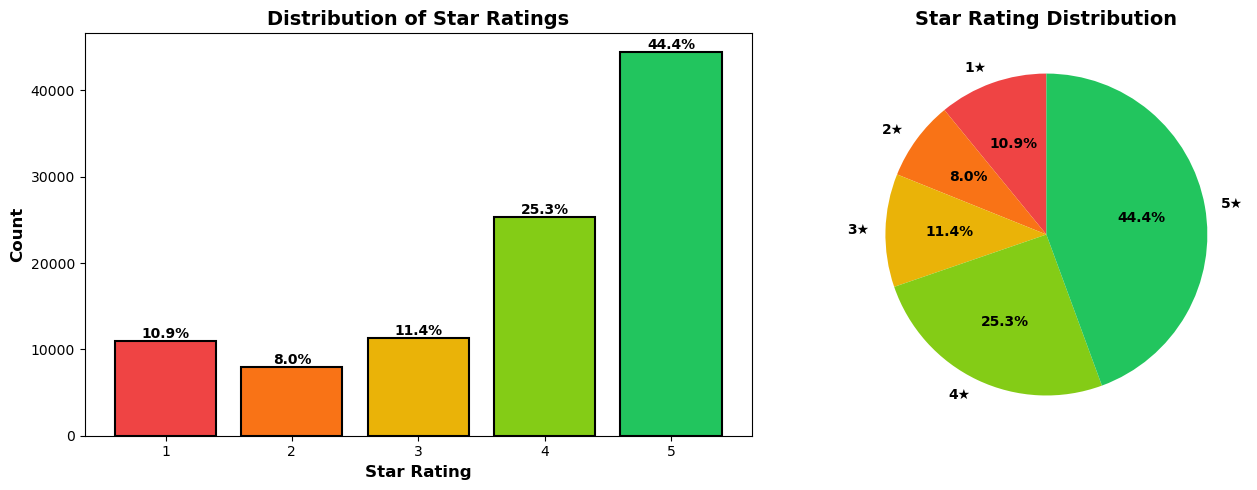

Saved as: fig1_star_distribution.png


In [ ]:
# Extract target variable
y = df['stars'].values  # This is what we want to predict

print("\n" + "="*100)
print("TARGET VARIABLE: Star Ratings")
print("="*100)

# Count each class
unique, counts = np.unique(y, return_counts=True)
print("\nClass distribution:")
for star, count in zip(unique, counts):
    pct = 100 * count / len(y)
    bar = "[]" * int(pct)
    print(f"  {star}★: {count:6,} ({pct:5.2f}%) {bar}") # Visual bar

# Check for imbalance
max_count = counts.max()
min_count = counts.min()
imbalance_ratio = max_count / min_count
print(f"\nImbalance ratio: {imbalance_ratio:.2f}:1")
print(f"   (Most common / Least common)")



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#ef4444', '#f97316', '#eab308', '#84cc16', '#22c55e']
bars = ax1.bar(unique, counts, color=colors, edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Star Rating', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Distribution of Star Ratings', fontsize=14, fontweight='bold')
ax1.set_xticks(unique)
ax1.set_xticklabels([f'{int(s)}' for s in unique])

# Add percentages on bars
for i, (star, count) in enumerate(zip(unique, counts)):
    pct = 100 * count / len(y)
    ax1.text(star, count, f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

# Pie chart
percentages = 100 * counts / len(y)
ax2.pie(counts, labels=[f'{int(s)}★' for s in unique], autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontweight': 'bold'})
ax2.set_title('Star Rating Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('fig1_star_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("Saved as: fig1_star_distribution.png")